In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn import svm, metrics
import keras
from sklearn.metrics import classification_report, confusion_matrix
import imageio
import matplotlib.image as mpimage
import cv2
import glob
import h5py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
IMG_WIDTH=25
IMG_HEIGHT=25
def get_dataset():
    image_array=[]
    img_folder="C:\\Users\\HP\\Desktop\\pr\\character_recognition\\archive\\Img"
    for file in os.listdir(img_folder):
        
        image_path= img_folder+"\\" +file
        
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        image=cv2.resize(image, (IMG_HEIGHT , IMG_WIDTH),interpolation = cv2.INTER_AREA)
        
        image=np.array(image)
        
        image = image.astype('float32')
        
        image /= 255 
        
        image_array.append(image)
        
    return image_array

img_data =get_dataset()

In [3]:
print("shape of the obtained data: ",np.array(img_data).shape)

shape of the obtained data:  (3410, 25, 25)


In [4]:
n_samples, nx, ny = np.array(img_data).shape
img_data=np.array(img_data).reshape((n_samples, nx*ny))

In [7]:
labels=pd.read_csv("C:\\Users\\HP\\Desktop\\pr\\character_recognition\\archive\\english.csv")
labels=labels.values.tolist()

In [8]:
new_labels=[]
for i in labels:
    new_labels.append(i[1])
print(new_labels)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',

In [9]:
print(np.array(new_labels))

['0' '0' '0' ... 'z' 'z' 'z']


In [10]:
from sklearn.preprocessing import LabelEncoder
targetNames=np.unique(np.array(new_labels))
le=LabelEncoder()
new_labels=le.fit_transform(np.array(new_labels))

In [11]:
print(np.array(new_labels))

[ 0  0  0 ... 61 61 61]


In [ ]:
#FORMING THE FINAL DATAFRAME

#data = {'Image':img_data,
#        'label':new_labels } 
 
# Creating DataFrame 
#df = pd.DataFrame(data) 
 
# Print the dataframe
#df

In [12]:
from sklearn.model_selection import KFold
def classify(n_splits,classifier,features_train,labels_train,cv):
    scores = cross_val_score(classifier,features_train,labels_train,scoring='accuracy',error_score="raise",cv=cv,n_jobs=-1)
    return scores
    

In [13]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [14]:
from numpy import mean
from numpy import std

def apply_svm(global_features_train,global_labels_train):
    clf = svm.SVC(kernel='linear')
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("LINEAR SVM:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    clf  = svm.SVC(kernel='rbf')
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("RBF SVM:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    clf  = svm.SVC(kernel='poly')
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("POLYNOMIAL SVM:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    clf  = svm.SVC(kernel='sigmoid')
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("SIGMOID SVM:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [15]:
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
def apply_tree(global_features_train,global_labels_train):
    
    clf = DecisionTreeClassifier(criterion="gini")
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("GINI INDEX:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    clf = DecisionTreeClassifier(criterion="entropy")
    scores=classify(10,clf,global_features_train,global_labels_train,cv)
    print("ENTROPY INDEX:\n",scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def apply_knn(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25)
    neighbors = range(1,25)
    test_results = []
    for n in neighbors:
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(x_train, y_train)
        train_pred = model.predict(x_test)
        test_results.append(accuracy_score(y_test,train_pred))
        print(n)

    plt.plot(neighbors,test_results,linestyle = 'dotted')
    plt.show()

DECISION TREE

GINI INDEX:
 [0.19061584 0.2170088  0.19061584 0.20821114 0.24340176 0.21407625
 0.19354839 0.20527859 0.18768328 0.18768328]
Accuracy: 0.204 (0.017)
ENTROPY INDEX:
 [0.23167155 0.29032258 0.2111437  0.23753666 0.228739   0.25219941
 0.25513196 0.26099707 0.21407625 0.23167155]
Accuracy: 0.241 (0.023)

SUPPORT VECTOR MACHINE

LINEAR SVM:
 [0.37536657 0.4398827  0.44281525 0.38709677 0.37829912 0.4516129
 0.42228739 0.41642229 0.37243402 0.40469208]
Accuracy: 0.409 (0.028)
RBF SVM:
 [0.45454545 0.48680352 0.48973607 0.46627566 0.48093842 0.51906158
 0.45747801 0.52199413 0.47507331 0.48680352]
Accuracy: 0.484 (0.022)
POLYNOMIAL SVM:
 [0.40469208 0.43695015 0.48093842 0.38123167 0.40762463 0.47214076
 0.42815249 0.4516129  0.38416422 0.43108504]
Accuracy: 0.428 (0.032)
SIGMOID SVM:
 [0.00293255 0.         0.         0.00293255 0.0058651  0.0058651
 0.0058651  0.00293255 0.00293255 0.00293255]
Accuracy: 0.003 (0.002)

KNN

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


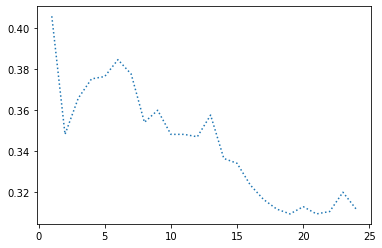

DECISION TREE

GINI INDEX:
 [0.8        0.86       0.86       0.87755102 0.75510204 0.89795918
 0.85714286 0.87755102 0.87755102 0.79591837]
Accuracy: 0.846 (0.044)
ENTROPY INDEX:
 [0.88       0.84       0.84       0.87755102 0.91836735 0.87755102
 0.87755102 0.91836735 0.81632653 0.7755102 ]
Accuracy: 0.862 (0.042)

SUPPORT VECTOR MACHINE

LINEAR SVM:
 [0.96       1.         1.         0.97959184 1.         0.97959184
 1.         1.         0.97959184 0.97959184]
Accuracy: 0.988 (0.013)
RBF SVM:
 [1.         1.         0.98       0.97959184 1.         0.95918367
 0.97959184 1.         1.         0.97959184]
Accuracy: 0.988 (0.014)
POLYNOMIAL SVM:
 [0.98       1.         0.98       0.97959184 0.95918367 1.
 0.97959184 1.         1.         1.        ]
Accuracy: 0.988 (0.013)
SIGMOID SVM:
 [0.96       0.98       0.98       0.97959184 1.         0.93877551
 0.95918367 1.         0.93877551 0.97959184]
Accuracy: 0.972 (0.021)

KNN

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


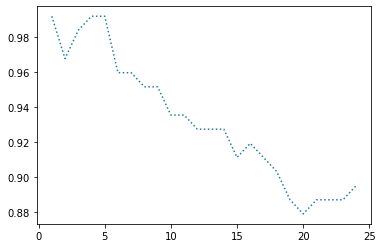

In [18]:
global_features_train = img_data 
global_labels_train = new_labels 

print("DECISION TREE\n")
apply_tree(global_features_train,global_labels_train)
print("\nSUPPORT VECTOR MACHINE\n")
apply_svm(global_features_train,global_labels_train)
print("\nKNN\n")
apply_knn(global_features_train,global_labels_train)

#print(global_features_train[0])


h5f_data=h5py.File('C:\\Users\\HP\\Desktop\\pr\\character_recognition\\Dataset\\data.h5','r')
h5f_label=h5py.File('C:\\Users\\HP\\Desktop\\pr\\character_recognition\\Dataset\\labels.h5','r')
global_features_string_train= h5f_data['dataset_1']
global_labels_string_train=h5f_label['dataset_1']
global_features_train=np.array(global_features_string_train)
global_labels_train=np.array(global_labels_string_train)

print("DECISION TREE\n")
apply_tree(global_features_train,global_labels_train)
print("\nSUPPORT VECTOR MACHINE\n")
apply_svm(global_features_train,global_labels_train)
print("\nKNN\n")
apply_knn(global_features_train,global_labels_train)

In [ ]:
#from sklearn.model_selection import cross_val_predict
#y_pred = cross_val_predict(clf, global_features_train,global_labels_train , cv=10)
#conf_mat = confusion_matrix(global_labels_train, y_pred)

In [ ]:
#print(conf_mat)